In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dog_df = pd.read_csv("./data_pd/Dog_Bites_Data.csv")
dog_df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


In [3]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    22663 non-null  int64 
 1   DateOfBite  22663 non-null  object
 2   Species     22663 non-null  object
 3   Breed       20445 non-null  object
 4   Age         11442 non-null  object
 5   Gender      22663 non-null  object
 6   SpayNeuter  22663 non-null  bool  
 7   Borough     22663 non-null  object
 8   ZipCode     16805 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


In [5]:
dog_df['Age'].dropna()

3          4
5         4Y
8         5Y
9         3Y
11         7
        ... 
22654      8
22657      1
22658      7
22659      5
22660    10M
Name: Age, Length: 11442, dtype: object

In [7]:
dog_df['Age'].unique()

array([nan, '4', '4Y', '5Y', '3Y', '7', '6', '5', '8', '11', '3', '13Y',
       '2', '10M', '1', '9M', '9', '10', '8M', '13', '4M', '10W', '7-8M',
       '12', '15', '7 YRS', '11M', '5 YRS', '2 YRS', '8 YRS', '3 YRS',
       '10 YRS', '7M', '14', '5M', '2YRS', '3 MONS', '4 M', '12 YRS',
       '6 YRS', '3 1/2 YRS', '16', '6M', '2.5', '2Y', '2M', '9 YRS', '19',
       '3M', '4 YRS', '2022-06-07T00:00:00.000', '13 yrs', '14 YRS',
       '13M', '11WKS', '11MOS', '2022-03-04T00:00:00.000', '4-6MOS', '4m',
       '14M', '3 MTHS', '6Y', '10Y', '1.5', '2-3MOS',
       '2022-03-05T00:00:00.000', '2,4,5,& 6', '13 YRS',
       '2022-05-06T00:00:00.000', '9 MONS', '20', '3 MOS', '5 MOS',
       '10 yrs', '4MO', '6MO', '2 MONS.', '1 YRS', '8 MONS', '12WKSKS',
       '11 MONS', '10 MOS', '10+', '2022-02-04T00:00:00.000', '7 MOS',
       '11 MOS', '3YRS', '16W', '7MOS', '11-12YRS', '3Q', '8Y', '7Y',
       '8MTHS', '8W', '16 MONS', '7 mons', '4.5', '21M', '04M', '3.5',
       '4 MONS', '17', '7YRS',

In [9]:


# Handling missing values by replacing NaN with 0
dog_df['Age'] = dog_df['Age'].fillna(0)

# Removing non-numeric characters and convert the column to numeric type
dog_df['Age'] = pd.to_numeric(dog_df['Age'], errors='coerce')

# Step 3: Replace invalid age values (e.g., negative ages) with NaN
dog_df.loc[dog_df['Age'] < 0, 'Age'] = np.nan

# Displaying cleaned Age column statistics to verify the result
print(dog_df['Age'].describe())


count    21451.000000
mean         2.295711
std          3.315725
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max         41.000000
Name: Age, dtype: float64


In [10]:
dog_df['Age']

0        0.0
1        0.0
2        0.0
3        4.0
4        0.0
        ... 
22658    7.0
22659    5.0
22660    NaN
22661    0.0
22662    0.0
Name: Age, Length: 22663, dtype: float64

In [13]:

n = dog_df.Age.count()  
q1 = (25/100)*(n+1)
q3 = (75/100)*(n+1)
ls = dog_df.sort_values(by='Age', ascending=True)['Age'].to_list()

Q1 = ls[int(q1) - 1]
Q3 = ls[int(q3) - 1]
# Q1 = np.percentile(ls, 25)
# Q3 = np.percentile(ls, 75)
IQR = Q3 - Q1
print(f"Q1 is {Q1}, Q3 is {Q3} and IQR is {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in ls if x < lower_bound or x > upper_bound]

print("lower_bound: ", lower_bound)
print("upper_bound: ", upper_bound)
print("Arrays: ", ls)
print("Outliers: ", outliers)

Q1 is 0.0, Q3 is 4.0 and IQR is 4.0
lower_bound:  -6.0
upper_bound:  10.0
Arrays:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

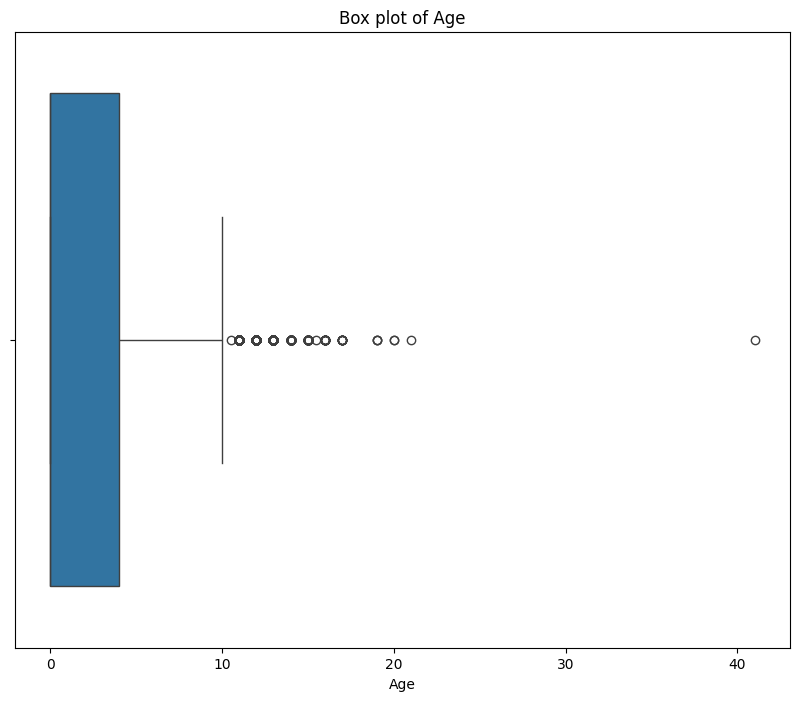

In [12]:
# Plotting the Box Plot
plt.figure(figsize=(10,8))
sns.boxplot(data=dog_df['Age'], orient='h')
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()